# DATA SCIENCE PROJECT
## Data Preperation

Before we can start with the actual data analysis, we need to prepare the data. Indeed this is a crucial step in data analysis and prediction. Without a good data preparation, the results of the analysis will be biased and the prediction will be wrong. Therefore, we start by importing the correct libraries in order to be able to perform the data preparation. Then, we import the data and we start by cleaning the data.

### Importing libraries

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Step 1 - Loading the data

Here we load the data from the csv file. We use the pandas library to do this. We also print the first 5 rows of the data to get an idea of what the data looks like. Since the data is the same for each year, we only load the data of 2022. All of the data is the same in each file. we will use this data to create a function called **prepare_data** that will be used to prepare the data for each year.

In [35]:
# Load datas in the txt files in Data folder and make a dataframe out of it
df = pd.read_csv("Data/valeursfoncieres-2022.txt", sep="|", low_memory=False)

Let's display all the columns of the data.

In [36]:
print((df.columns))

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


Let's start by analysing all columns types and values.
| Variable Name                | Type         | Description                                                                                                   |
|------------------------------|--------------|---------------------------------------------------------------------------------------------------------------|
| Identifiant de document      | Numeric      | Unique identifier for each document in the dataset.                                                           |
| Reference document           | Numeric      | Reference document associated with the transaction.                                                           |
| 1 Articles CGI               | Text         | First reference to the articles of the French General Tax Code (CGI) related to the transaction.             |
| 2 Articles CGI               | Text         | Second reference to the articles of the French General Tax Code (CGI) related to the transaction.            |
| 3 Articles CGI               | Text         | Third reference to the articles of the French General Tax Code (CGI) related to the transaction.             |
| 4 Articles CGI               | Text         | Fourth reference to the articles of the French General Tax Code (CGI) related to the transaction.            |
| 5 Articles CGI               | Text         | Fifth reference to the articles of the French General Tax Code (CGI) related to the transaction.             |
| No disposition               | Numeric      | Disposition number associated with the transaction.                                                           |
| Date mutation                | Date/Time    | Date when the transaction/mutation took place.                                                                 |
| Nature mutation              | Text         | Nature of the transaction, such as sale, inheritance, donation, etc.                                          |
| Valeur fonciere              | Numeric      | Property value, i.e., the amount of money involved in the transaction.                                        |
| No voie                      | Numeric      | Street number of the property.                                                                                |
| B/T/Q                        | Text         | Building/Tower/Block identifier, if applicable.                                                               |
| Type de voie                 | Text         | Type of road, such as street, avenue, boulevard, etc.                                                         |
| Code voie                    | Numeric      | Code associated with the road.                                                                                 |
| Voie                         | Text         | Name of the road.                                                                                             |
| Code postal                  | Numeric      | Postal code of the property.                                                                                   |
| Commune                      | Text         | Name of the municipality where the property is located.                                                        |
| Code departement             | Numeric      | Code associated with the department where the property is located.                                             |
| Code commune                 | Numeric      | Code associated with the municipality where the property is located.                                           |
| Prefixe de section           | Numeric      | Prefix of the section where the property is located.                                                           |
| Section                      | Text         | Section where the property is located.                                                                         |
| No plan                      | Numeric      | Plan number associated with the property.                                                                      |
| No Volume                    | Numeric      | Volume number associated with the property.                                                                    |
| 1er lot                      | Numeric      | First lot associated with the property.                                                                        |
| Surface Carrez du 1er lot    | Numeric      | Carrez surface (official living area) of the first lot.                                                        |
| 2eme lot                     | Numeric      | Second lot associated with the property.                                                                       |
| Surface Carrez du 2eme lot   | Numeric      | Carrez surface (official living area) of the second lot.                                                       |
| 3eme lot                     | Numeric      | Third lot associated with the property.                                                                        |
| Surface Carrez du 3eme lot   | Numeric      | Carrez surface (official living area) of the third lot.                                                        |
| 4eme lot                     | Numeric      | Fourth lot associated with the property.                                                                       |
| Surface Carrez du 4eme lot   | Numeric      | Carrez surface (official living area) of the fourth lot.                                                       |
| 5eme lot                     | Numeric      | Fifth lot associated with the property.                                                                        |
| Surface Carrez du 5eme lot   | Numeric      | Carrez surface (official living area) of the fifth lot.                                                        |
| Nombre de lots               | Numeric      | Number of lots associated with the property.                                                                   |
| Code type local              | Numeric      | Code representing the type of property (apartment, house, etc.).                                               |
| Type local                   | Text         | Type of property (apartment, house, etc.).                                                                     |
| Identifiant local            | Numeric      | Local identifier associated with the property.                                                                 |
| Surface reelle bati          | Numeric      | Actual built-up area of the property.                                                                          |
| Nombre pieces principales    | Numeric      | Number of main rooms in the property.                                                                          |
| Nature culture               | Text         | Type of cultivated land associated with the property.                                                          |
| Nature                        | ???          | The description provided in the input is cut-off here.   |



## Step 2 - Data cleaning

### Step 2.1 - Missing values

##### The goal here is not to have missing values anymore. But, we cannot do this by dropping the rows and columns that it concerns because we would loose to much data and maybe even the meaning of this very data. So we will adapt to the meaning of each column and rows the value that should be there.

##### For example in the column 'Surface Carrez du 5eme lot', if there is no value, it means that there is no 5th lot. So we will replace the NaN values by 0.

In the following code, we will see the percentage of missing values for each column.

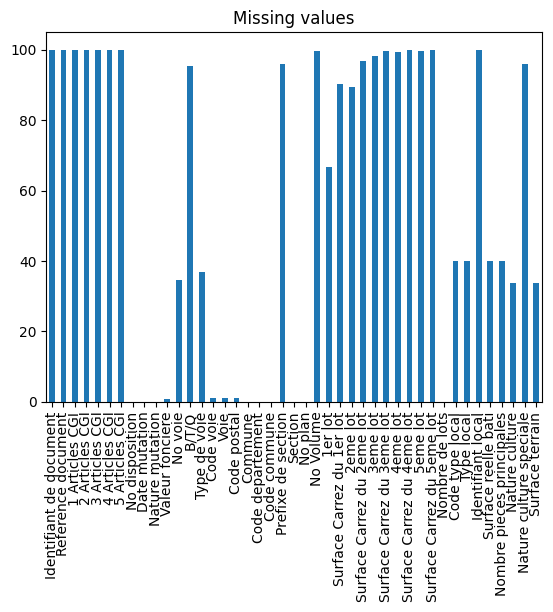

In [37]:
missing_values_count = df.isnull().sum() / len(df) * 100

# bar plot the missing values
plt.figure()
plt.title('Missing values')
missing_values_count.plot.bar()
plt.show()

By examining the percentages of missing values, we can firstly remove all columns that have 100% of missing values. 

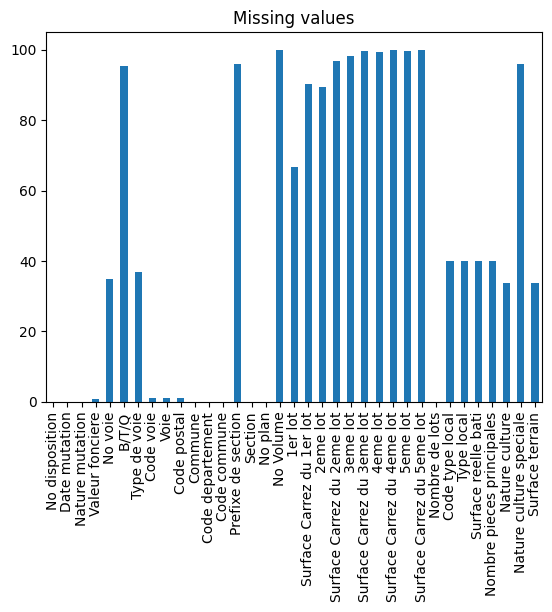

In [38]:
# Drop columns with 100% missing values
df = df.dropna(axis=1, how='all')

missing_values_count = df.isnull().sum() / len(df) * 100

# bar plot the missing values
plt.figure()
plt.title('Missing values')
missing_values_count.plot.bar()
plt.show()


As we can see, we have removed all 5 first columns. Now let's examine the type of other columns that have missing values.

In [39]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns_table = pd.DataFrame({
    'Column Name': missing_columns.index,
    'Data Type': df.dtypes[missing_columns.index],
    'Missing Values': missing_columns.values
})

print("Columns with missing values:")
print(missing_columns_table)


Columns with missing values:
                                           Column Name Data Type  \
Valeur fonciere                        Valeur fonciere    object   
No voie                                        No voie   float64   
B/T/Q                                            B/T/Q    object   
Type de voie                              Type de voie    object   
Code voie                                    Code voie    object   
Voie                                              Voie    object   
Code postal                                Code postal   float64   
Prefixe de section                  Prefixe de section   float64   
Section                                        Section    object   
No Volume                                    No Volume    object   
1er lot                                        1er lot    object   
Surface Carrez du 1er lot    Surface Carrez du 1er lot    object   
2eme lot                                      2eme lot    object   
Surface Carrez du 2

All Right, as we can see, this data is extreamly dirty, many missing values, many categorical data, many numerical data, many data that are not in the right format. We will have to clean it all. Let's do this variable per variable to obtain a clean dataset.

##### Valeur foncière

First, we will start with "Valeur fonciere" which is the target variable. We will remove all rows that have a missing value for this variable.

In [40]:
# Remove rows with missing values for the columns 'Valeur fonciere'
df = df.dropna(subset=['Valeur fonciere'])

##### No Voie
We will also delete the column No Voie because we believe that it is not relevant for our analysis.

In [41]:
# delete column 'No Voie'
df = df.drop(['No voie'], axis=1)

##### B/T/Q

We have had a hard time understanding this variable, indeed the documents says it corresponds to the "indice de répétition". The values contained are categorical, but we do not know what they mean. We have tried to find the meaning of these values but we have not succeeded. We have therefore decided to delete this column.


In [42]:
# delete column B/T/Q
df = df.drop(['B/T/Q'], axis=1)

##### Type de voie

The variable seems important in the prediction of the target variable. We will therefore keep it. However, we will have to transform it into a numerical variable. First let's see what are the different categories of this variable.

In [43]:
# see categories of the column 'Type de voie'
print(df['Type de voie'].value_counts())

Type de voie
RUE     1357055
AV       308881
RTE      151665
CHE      133760
BD       100452
         ...   
ZUP           1
EMBR          1
RULT          1
CIVE          1
DEVI          1
Name: count, Length: 134, dtype: int64


As we can see there are 134 different categories, so we can not perform One Hot Encoding. We will therefore use Code mapping to transform this variable into a numerical variable.

In [44]:
# Create a mapping dictionary for alphanumeric codes
code_mapping = {code: i for i, code in enumerate(df['Type de voie'].unique())}

# Map the alphanumeric codes to numeric values
df['Type de voie'] = df['Type de voie'].map(code_mapping)

print(df['Type de voie'].value_counts())

Type de voie
1      1389927
0      1357055
6       308881
2       151665
8       133760
        ...   
101          1
104          1
111          1
118          1
131          1
Name: count, Length: 135, dtype: int64


All Good ! let's move to another column !

##### Code voie

We will delete this column because it contains redundant information with the column "Type de voie", and "Voie"

In [45]:
# delete this column
df = df.drop(['Code voie'], axis=1)

##### Voie

For this part, after long relfexion, we have decided to remove the column "Voie" because we believe that it is not relevant for our analysis. Indeed we believe that the type of road is more important than the name of the road, and the location of these roads are contained in the 'Postal code' column.

In [46]:
# remove the 'Voie' column
df = df.drop(['Voie'], axis=1)

##### Code postal

We will keep this column because it seems important in the prediction of the target variable. It is already a numerical column, but there are many missing values. What we chose to do was remove the rows that have missing values for this column.


In [47]:
# remove rows with missing values for the column 'Code postal'
df = df.dropna(subset=['Code postal'])

##### Lots

For these variables, what we chose to do was to replace the missing values by 0. Indeed, if there is no lot, it means that there is no surface area for this lot. We will therefore replace the missing values by 0. Before doing so, let's convert these columns to numerical columns.

In [48]:
import pandas as pd

columns = [
    'Surface Carrez du 1er lot',
    'Surface Carrez du 2eme lot',
    'Surface Carrez du 3eme lot',
    'Surface Carrez du 4eme lot',
    'Surface Carrez du 5eme lot',
    '1er lot',
    '2eme lot',
    '3eme lot',
    '4eme lot',
    '5eme lot'
]

for column in columns:
    if df[column].dtype == object:  # Check if the column is of object/string type
        df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')

Now we will create a new variable, which will be the sum of all the surfaces of the lots. We will call this variable "Surface Carrez lots totale". We will also create a new variable which will be the sum of all the lots. We will call this variable "Nombre de lots total".


In [49]:
# create a new column 'Surface Carrez lots totale'
df['Surface Carrez lots totale'] = df['Surface Carrez du 1er lot'] + df['Surface Carrez du 2eme lot'] + df['Surface Carrez du 3eme lot'] + df['Surface Carrez du 4eme lot'] + df['Surface Carrez du 5eme lot']

# remove the columns 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'
df = df.drop(['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], axis=1)

# create a new column 'Nombre de lots totale'
df['Nombre de lots totale'] = df['1er lot'] + df['2eme lot'] + df['3eme lot'] + df['4eme lot'] + df['5eme lot']

# remove the columns '1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot'
df = df.drop(['1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot'], axis=1)

##### Référence castastre de la parcelle

For all 4 variables:
- Prefixe de section
- Section
- Code commune
- Code departement
- No plan

We will delete these columns because we believe that they are not relevant for our analysis. Indeed, we believe that the location of the property is already contained in the 'Postal code' column.

In [50]:
colums = [
    'Prefixe de section',
    'Section',
    'Code departement',
    'Code commune',
    'No plan',
]

for column in colums:
    # delete column
    df = df.drop([column], axis=1)

##### No Volume

This column corresponds to the division of the space above and below for certain vertical co-ownerships. We will delete this column because we believe that it is not relevant for our analysis.

In [51]:
# delete column 'No Volume'
df = df.drop(['No Volume'], axis=1)

##### Code type local

Same as the previous column, we will delete this column because we believe that it is not relevant for our analysis.

In [52]:
# delete column 'Code type local'
df = df.drop(['Code type local'], axis=1)

##### Type local

We will keep this column because it seems important in the prediction of the target variable. It is already a categorical column, but there are many missing values. What we chose to do was create a new category called "Unknown" for the missing values.

In [53]:
# replace missing values with "Unknown"
df['Type local'] = df['Type local'].fillna("Unknown")

Let's see the different categories of this variable.

In [54]:
# show values of the column 'Type local'
print(df['Type local'].value_counts())

Type local
Unknown                                     1460712
Dépendance                                  1004746
Maison                                       631873
Appartement                                  524760
Local industriel. commercial ou assimilé     117945
Name: count, dtype: int64


As we can see there are only 5 different categories, so we can perform One Hot Encoding. We will therefore use One Hot Encoding to transform this variable into a numerical variable.

In [55]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['Type local'])

##### Surface réelle bati + Surface terrain + Nombre pieces principales

We will keep these 3 columns because they seems important in the prediction of the target variable. They are already numerical columns, but there are many missing values. What we chose to do was replace the missing values by 0.

In [56]:
columns = [
    'Surface reelle bati',
    'Nombre pieces principales',
    'Surface terrain',
]

for column in columns:
		df[column] = df[column].fillna(0)

##### Nature culture + Nature culture speciale

These variables are important for our analysis. We will therefore keep them. However, they are categorical variables, so we will have to transform them into numerical variables. First let's see what are the different categories of these variables.

In [57]:
# show values of the column 'Nature culture'
print(df['Nature culture'].value_counts())

# show values of the column 'Nature culture speciale'
print(df['Nature culture speciale'].value_counts())

Nature culture
S     1285486
T      333868
P      174587
J      133577
AB     112710
AG     101466
BT      98821
L       84095
VI      37481
BR      30452
VE      27016
BS      15987
PA      15373
B       11325
E        9317
BP       8566
BF       4855
PC       1922
PP       1894
BM       1353
PH       1183
CA        629
CH        581
LB        284
PE        179
TP         74
BO         41
Name: count, dtype: int64
Nature culture speciale
POTAG    37030
PARC     16730
PATUR    15428
PIN      10727
FRICH     9149
         ...  
ROUI         1
CERCL        1
CRAY         1
EAU          1
TAMAR        1
Name: count, Length: 124, dtype: int64


As we can see there are multiple categories, so we can not perform One Hot Encoding. We will therefore use Code mapping to transform these variables into a numerical variable.

In [58]:
columns = [
    'Nature culture',
    'Nature culture speciale',
]

for column in columns:
    # code mapping for alphanumeric codes
		code_mapping = {code: i for i, code in enumerate(df[column].unique())}
		# map the alphanumeric codes to numeric values
		df[column] = df[column].map(code_mapping)

Now that we have no more missing values in our dataframe, let's check each column, and the size of our dataframe.


In [59]:
print(df.columns)
print(df.shape)

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'Type de voie', 'Code postal', 'Commune', 'Nombre de lots',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain',
       'Surface Carrez lots totale', 'Nombre de lots totale',
       'Type local_Appartement', 'Type local_Dépendance',
       'Type local_Local industriel. commercial ou assimilé',
       'Type local_Maison', 'Type local_Unknown'],
      dtype='object')
(3740036, 20)


As we can see there are certain vairables let untouched, let's see what they are.

##### No disposition

This column corresponds to the number of the disposition. We will delete this column because we believe that it is not relevant for our analysis.

In [60]:
# delete the column No disposition
df = df.drop(['No disposition'], axis=1)

##### Date mutation

This column corresponds to the date of the mutation. We will delete is as well, indeed, because the file already contains data regarding this specific year (2022).

In [61]:
df = df.drop(['Date mutation'], axis=1)


##### Nature mutation

This column corresponds to the nature of the mutation. We believe these variables to have a great impact on the price of the parcel. Therefore we want to keep it. However it is a text categorical data, so we need to transform it into a numerical data. Let's see what are the different categories of this variable.



In [62]:
print(df['Nature mutation'].value_counts())

Nature mutation
Vente                                 3498650
Vente en l'état futur d'achèvement     192458
Echange                                 31667
Vente terrain à bâtir                   11743
Adjudication                             5235
Expropriation                             283
Name: count, dtype: int64


As we can see there are multiple categories, so we can not perform One Hot Encoding. We will therefore use Code mapping to transform this variable into a numerical variable.

In [63]:
# map variables to numeric values
code_mapping = {code: i for i, code in enumerate(df['Nature mutation'].unique())}
df['Nature mutation'] = df['Nature mutation'].map(code_mapping)


##### Commune

Remove this column because we believe that it is not relevant for our analysis. Indeed, we believe that the location of the property is already contained in the 'Postal code' column.

In [64]:
df = df.drop(['Commune'], axis=1)

##### Valeur foncière

Now we will remove convert the column "Valeur foncière" to a numerical column. 

In [65]:
# convert "Valeur fonciere" to numeric
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.')
df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)

Now that we have a clean dataset, let's save it.

### Step 2.2 - Normalization

We decided to normalize all of our variables besides the target variable, and then save them seperately in our files.

In [66]:
# Convert boolean variables to 0 or 1
 

# save the dataset to a new csv file
df["Valeur fonciere"].to_csv('data/valeursfoncieres-2022-target.csv', index=False)

df = df.drop(['Valeur fonciere'], axis=1)

# normalize the data
df = (df - df.min()) / (df.max() - df.min())

# save the dataset to a new csv file
df.to_csv('data/valeursfoncieres-2022.csv', index=False)



TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

## All set !

Now we can move to the data analysis part.